In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url='https://raw.githubusercontent.com/MeraLuis/Airlines-delays/main/Flight%20Delays.csv'
df= pd.read_csv(url, sep=',')
data = pd.read_csv(url)
df.head(10)


,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,...,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,2017,5,15,1,15/05/2017,DL,DFW,1605,1600,-5,...,731,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600\r
1,2017,5,15,1,15/05/2017,DL,MSP,700,656,-4,...,1276,6,0,0,0,0,0,0600-1200,0600-0800,0600-0700\r
2,2017,5,15,1,15/05/2017,DL,ATL,2147,2147,0,...,350,2,0,0,0,0,0,1800-2359,2000-2200,2100-2200\r
3,2017,5,15,1,15/05/2017,DL,MSP,1756,1757,1,...,1276,6,0,0,0,0,0,1200-1800,1600-1800,1700-1800\r
4,2017,5,15,1,15/05/2017,DL,DEN,600,646,46,...,1199,5,26,0,0,0,0,0600-1200,0600-0800,0600-0700\r
5,2017,5,15,1,15/05/2017,DL,ATL,2129,2126,-3,...,143,1,0,0,0,0,0,1800-2359,2000-2200,2100-2200\r
6,2017,5,15,1,15/05/2017,DL,ATL,811,807,-4,...,432,2,0,0,0,0,0,0600-1200,0800-1000,0800-0900\r
7,2017,5,15,1,15/05/2017,DL,ATL,813,811,-2,...,321,2,0,0,0,0,0,0600-1200,0800-1000,0800-0900\r
8,2017,5,15,1,15/05/2017,DL,BOS,1647,1641,-6,...,632,3,0,0,0,0,0,1200-1800,1600-1800,1600-1700\r
9,2017,5,15,1,15/05/2017,DL,ATL,1515,1510,-5,...,646,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600\r


**HIPÓTESIS**
* ¿Puede la frecuencia de vuelos programados por aeropuerto influir en la cantidad de vuelos demorados que presente?
Hipoótesis: Algunos aeropuertos, en relación a la cantidad de vuelos programados, tienden a presentar mas demoras que otros
* ¿Influye el horario de partida programado en las demoras?
Hipótesis: Los vuelos que operan en determinada franja horaria son mas propensos a sufrir demoras.
* ¿Existe realción entre demoras al arribo y la distancia recorrida?
Hipótesis: En los vuelos que recorren una mayor distancia se puede observar una menor cantidad de demoras al arribo.

Hipótesis **1** **bold text**

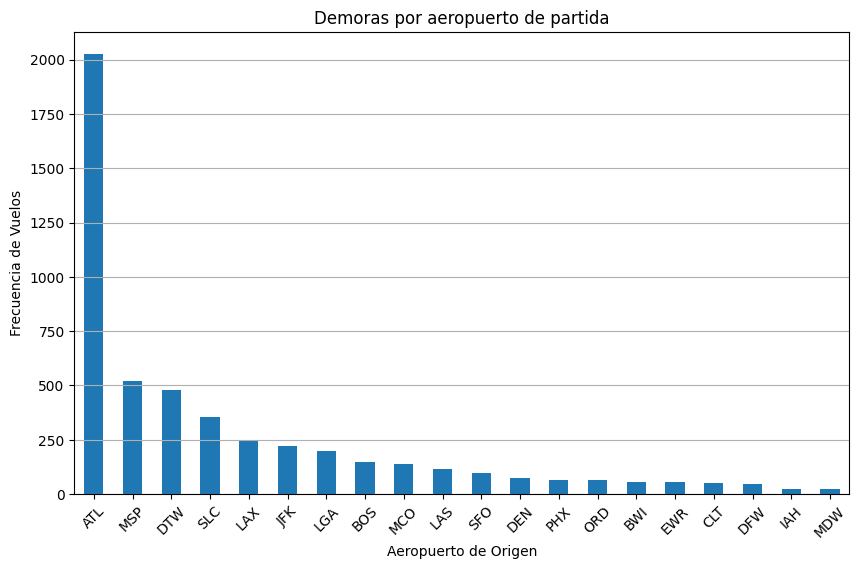

In [ ]:
origin_counts = data['Origin_Airport'].value_counts()
plt.figure(figsize=(10, 6))
origin_counts.plot(kind='bar')
plt.title('Demoras por aeropuerto de partida')
plt.xlabel('Aeropuerto de Origen')
plt.ylabel('Frecuencia de Vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y')

<ipython-input-7-b07fe1025bd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=origin_counts, x='Origin_Airport', y='Number_of_Flights', palette='viridis')


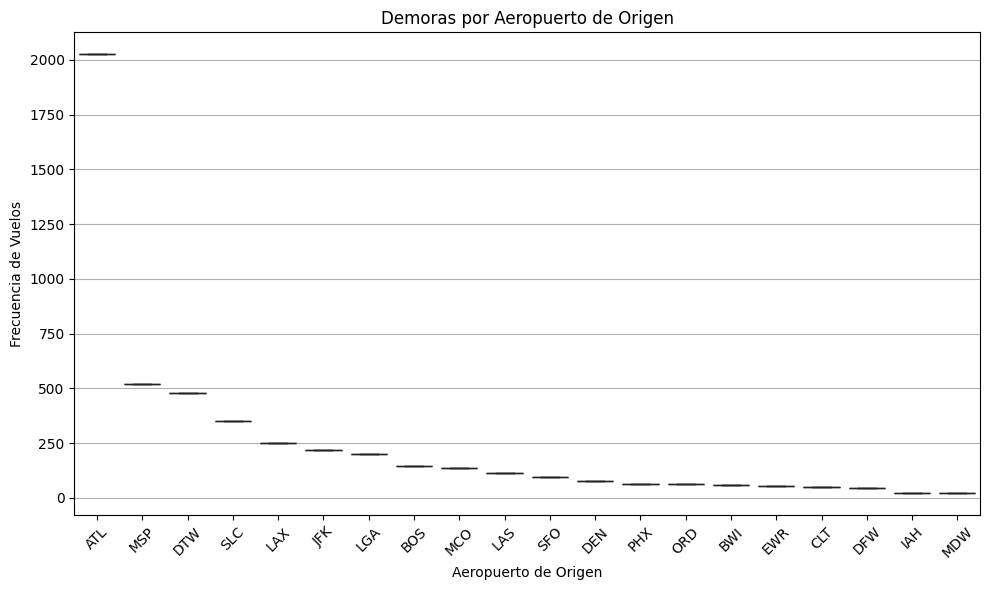

In [ ]:
plt.figure(figsize=(10, 6))
origin_counts = data['Origin_Airport'].value_counts().reset_index()
origin_counts.columns = ['Origin_Airport', 'Number_of_Flights']
sns.boxplot(data=origin_counts, x='Origin_Airport', y='Number_of_Flights', palette='viridis')
plt.title('Demoras por Aeropuerto de Origen')
plt.xlabel('Aeropuerto de Origen')
plt.ylabel('Frecuencia de Vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Del gráfico podemos observar una marcada frecuencia de vuelos partiendo del aeropuerto de Atlanta, seguido por el aeropuerto de Minneapolis. El resto de los aeropuertos presentan una frecuencia similar por lo que, para el análisis de la hipótesis planteada podemos verificar si en los dos primeros aeropuertos mencionados se produce la mayor cantidad de demoras puede deberse a una mayor programacion de vuelos.

**Hipótesis 2**

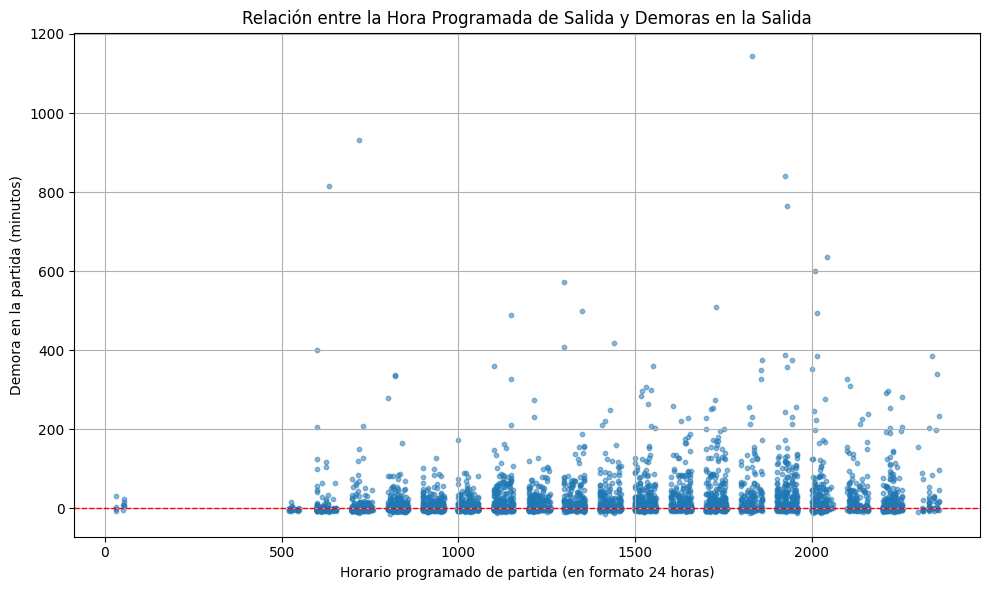

In [ ]:
data['Scheduled_Departure'] = pd.to_numeric(data['Scheduled_Departure'], errors='coerce')
data['Dep_Delay'] = pd.to_numeric(data['Dep_Delay'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(data['Scheduled_Departure'], data['Dep_Delay'], alpha=0.5, s=10)
plt.title('Relación entre la Hora Programada de Salida y Demoras en la Salida')
plt.xlabel('Horario programado de partida (en formato 24 horas)')
plt.ylabel('Demora en la partida (minutos)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid()
plt.tight_layout()
plt.show()

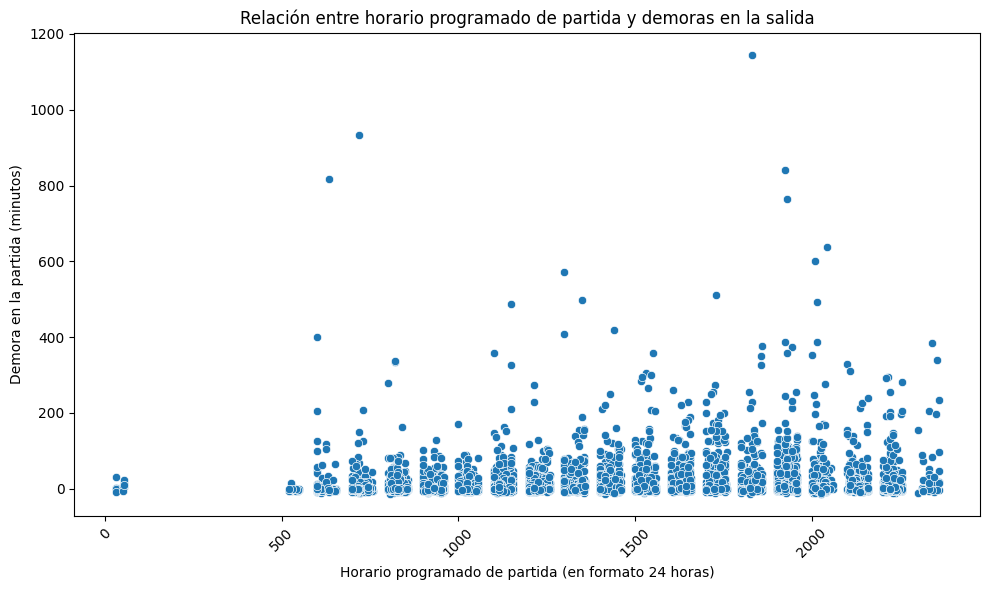

In [ ]:

data = data.dropna(subset=['Scheduled_Departure', 'Dep_Delay'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Scheduled_Departure', y='Dep_Delay', data=data)
plt.title('Relación entre horario programado de partida y demoras en la salida')
plt.xlabel('Horario programado de partida (en formato 24 horas)')
plt.ylabel('Demora en la partida (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el gráfico observamos que las demoras tienden a concentrarse de forma pareja a lo largo del día por lo que podemos decir que no influye de manera significativa el horario programado del vuelo


**Hipótesis 2**


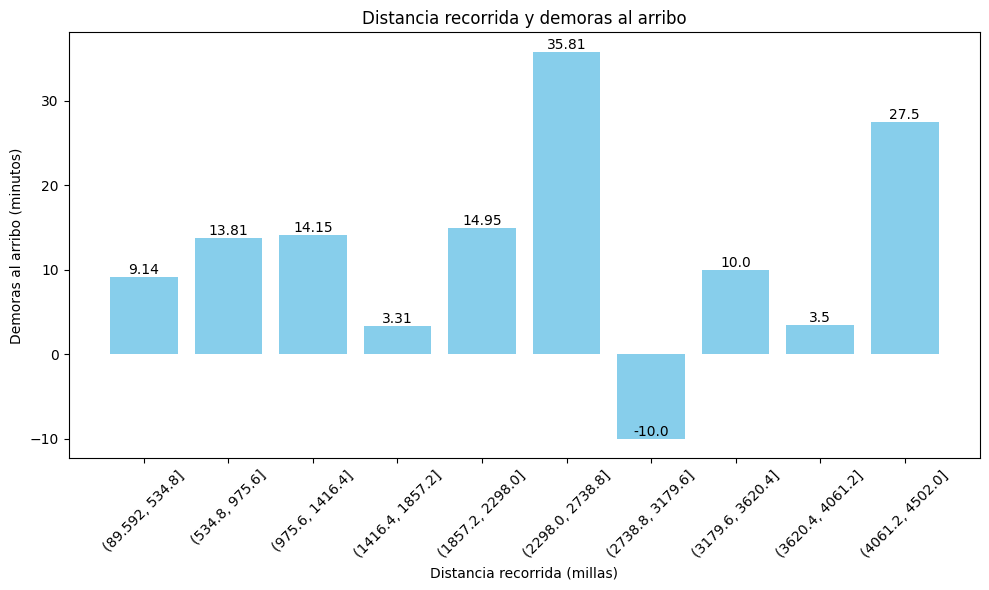

In [ ]:
data['Arrival_Delay'] = pd.to_numeric(data['Arrival_Delay'], errors='coerce')
data['Distance'] = pd.to_numeric(data['Distance'], errors='coerce')
data = data.dropna(subset=['Arrival_Delay', 'Distance'])
distance_bins = pd.cut(data['Distance'], bins=10)
grouped_data = data.groupby(distance_bins)['Arrival_Delay'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Distance'].astype(str), grouped_data['Arrival_Delay'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title('Distancia recorrida y demoras al arribo')
plt.xlabel('Distancia recorrida (millas)')
plt.ylabel('Demoras al arribo (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


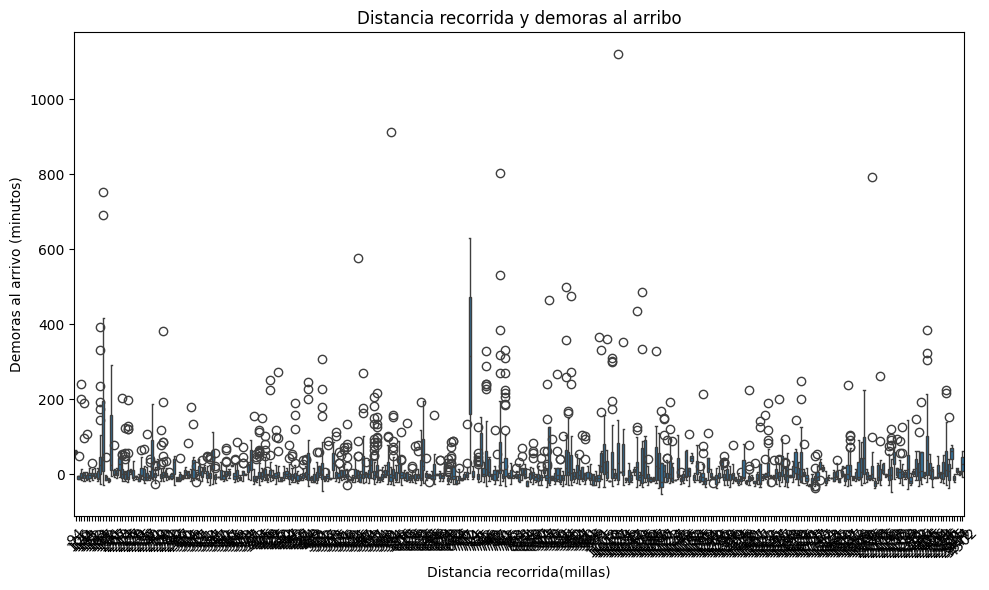

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance', y='Arrival_Delay', data=data)
plt.title('Distancia recorrida y demoras al arribo')
plt.xlabel('Distancia recorrida(millas)')
plt.ylabel('Demoras al arrivo (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que no exixte relación significativa entre la distancia recorrida y la demora al arribo ya que muy pocos vuelos con mayor distancia recorrida presentan menos demora al arribo por lo que la hipótesis puede ser descartada.